# Valiate semantic similarity

This notebook tries to validate the consistency of the semantic similarity measures that have been developed.

## Common imports and initializations

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [2]:
from linguistic_analysis.semantics.similarity import SemGraph, get_triangulation_angle_distance

import numpy as np
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from typing import Iterable, Tuple

## 1. Validate code

Load embedding models.

In [3]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
PARTIAL_MODELS_DIR = "../models/french_novels/balzac/separate/with_accents_lemmatized"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
model_paths = []
models = []

for root, dirs, files in os.walk(PARTIAL_MODELS_DIR):
    for f in files:
        if f.endswith(".model"):
            model_path = os.path.join(root, f)
            print("Loading {}...".format(model_path))
            model_paths.append(model_path)
            models.append(KeyedVectors.load(model_path))


Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - Honore de Balzac/model_w2v_s

Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gambara - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Cure de village - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Cure de Tours - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les deux poetes - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Peau de chagrin - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les paysans - Honore de Balzac/model_w2v_sg_w10_m

Initial keywords

In [4]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

**Build the base semgraph**

- Use this semgraph to select the words to include in every other semgraph.
- This set of words will be fixed.
- All the rest of the semgraphs will contain the same words.
- All links between words will be included in the semgraph.
- Set threshold for links of the semgraph to **0.7**.



In [5]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.7

In [6]:
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)


In [7]:
len(full_sem_graph.names)

26

### 1.1. Message passing based similarity

### 1.2. Graph triangulation based similarity

In [8]:
full_semgraph_triangulation = full_sem_graph.get_triangulation()

In [9]:
print("The triangulation has {} triangles".format(len(full_semgraph_triangulation.triangles)))
num_triangles = 100
print(f"\nThe {num_triangles} first triangles:")
for t in full_semgraph_triangulation.triangles[:num_triangles]:
    print(str(t) + "\n")

The triangulation has 211 triangles

The 100 first triangles:
Triangle[name: appointement_argent_revenu, appointement-argent: 1.0, argent-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_argent: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_bail_revenu, appointement-bail: 1.0, bail-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_bail: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_banque_revenu, appointement-banque: 1.0, banque-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_banque: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_banquier_revenu, appointement-banquier: 1.0, banquier-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_banquier: 0.9587276966002474, cos_revenu:0.14365288615226746]

Tr

## 2. Intra embedding consistency

## 3. Validation of the semantic similarity between different models

In [10]:
#print(f"{models[0]}: {model_paths[0]}")
#print(f"{models[1]}: {model_paths[1]}")

In [11]:
# Generate semgraphs for all the models
semgraphs = []
for m in tqdm(models):
    semgraphs.append(SemGraph.build_from_gensim_embedding(m, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD))

100%|██████████| 94/94 [00:10<00:00,  8.95it/s]


In [12]:
# Calculate the matrix of angle distances between the triangulations of the SemGraphs of the books.
angle_distance_matrix = np.zeros((len(semgraphs), len(semgraphs)))
for i in tqdm(range(len(semgraphs))):
    for j in tqdm(range(len(semgraphs))):
        if (i<j):
            angle_distance_matrix[i][j] = get_triangulation_angle_distance(semgraphs[i], semgraphs[j])[1]
        else:
            angle_distance_matrix[i][j] = angle_distance_matrix[j][i]

 70%|███████   | 66/94 [11:48<05:35, 11.98s/it]


 45%|████▍     | 42/94 [06:53<10:53, 12.56s/it]


 37%|███▋      | 35/94 [09:46<22:16, 22.65s/it]


 19%|█▉        | 18/94 [00:32<03:38,  2.87s/it]


 97%|█████████▋| 91/94 [18:26<00:24,  8.25s/it]


 98%|█████████▊| 92/94 [09:59<00:07,  3.65s/it]


 90%|█████████ | 85/94 [07:38<00:43,  4.80s/it]


 87%|████████▋ | 82/94 [12:34<02:26, 12.17s/it]


  0%|          | 0/94 [00:00<?, ?it/s]


 27%|██▋       | 25/94 [00:43<09:37,  8.37s/it]


 49%|████▉     | 46/94 [05:00<09:19, 11.65s/it]


 65%|██████▍   | 61/94 [04:09<04:50,  8.80s/it]


 85%|████████▌ | 80/94 [15:38<05:18, 22.74s/it]


 38%|███▊      | 36/94 [00:52<03:26,  3.56s/it]


 69%|██████▉   | 65/94 [08:21<05:49, 12.05s/it]


 38%|███▊      | 36/94 [00:06<00:46,  1.24it/s]


 89%|████████▉ | 84/94 [10:44<01:36,  9.70s/it]


 74%|███████▍  | 70/94 [20:40<19:17, 48.21s/it]


 72%|███████▏  | 68/94 [02:03<02:48,  6.50s/it]


 82%|████████▏ | 77/94 [03:49<02:03,  7.25s/it]


 55%|█████▌    | 52/94 [00:20<00:22,  1.83it/s]


 95%|█████████▍| 89/94 [03:22<00:07,  1.44s/it]


 94%|█████████▎| 88/94 [11:20<01:11, 11.89s/it]


 68%|██████▊   | 64/94 [00:48<02:28,  4.96s/it]


 76%|███████▌  | 71/94 [02:08<06:48, 17.75s/it]


 82%|████████▏ | 77/94 [00:53<01:44,  6.17s/it]


 94%|█████████▎| 88/94 [04:58<03:04, 30.75s/it]


100%|██████████| 94/94 [16:55:21<00:00, 648.10s/it]


In [13]:
angle_distance_matrix[0]

array([0.        , 0.90534063, 0.85381122, 0.9810766 , 0.87442469,
       0.9055083 , 0.88163848, 0.79824527, 0.82762758, 0.87442469,
       0.87920844, 0.83639538, 0.86594154, 0.90448059, 0.80089423,
       0.87501328, 0.87442469, 0.83433149, 0.83512726, 0.77073639,
       0.87442469, 0.86018294, 0.91460837, 0.86701543, 0.82442688,
       0.86296434, 0.85683863, 0.81698105, 0.86862766, 0.8896174 ,
       0.98712291, 0.85713942, 0.85656692, 0.87442469, 0.81361512,
       0.7764366 , 0.80603172, 0.98445585, 0.823778  , 0.86012766,
       0.83958102, 0.87442469, 0.81839435, 0.93226334, 0.85166959,
       1.00387764, 0.87442469, 0.87812509, 0.87339989, 0.85049183,
       0.87442469, 0.87442469, 0.90024167, 0.84801563, 0.86446391,
       0.80708841, 0.86795663, 0.85081598, 0.8156965 , 0.82475709,
       0.84718161, 0.77982722, 0.81293423, 0.87442469, 0.90165102,
       0.75998789, 0.8755244 , 0.85949166, 0.94577361, 0.87442469,
       0.85770073, 0.86334001, 0.77807671, 0.85363882, 0.79724

In [14]:
import plotly_express as px

?px.histogram

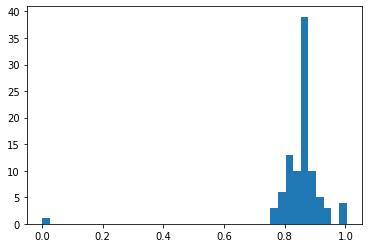

In [15]:
import matplotlib.pyplot as plt

plt.hist(angle_distance_matrix[0], bins=40);

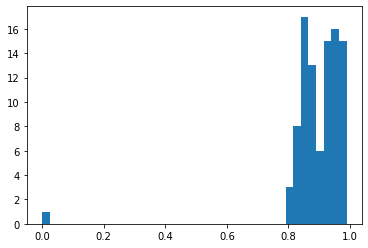

In [16]:
plt.hist(angle_distance_matrix[1], bins=40);

In [21]:
dir_name = "n_top_similar_10_similarity_threshold_0.7" 
!mkdir -p $dir_name


In [39]:
# Save distance matrix
import pickle

f_name = "angle_distance_matrix.pck"

with open(os.path.join(dir_name, f_name), "bw") as f:
    pickle.dump(angle_distance_matrix, f)
    
with open(os.path.join(dir_name, "base_words_array.pck"), "bw") as f:
    pickle.dump(base_words, f)
    
with open(os.path.join(dir_name, "full_sem_graph.pck"), "bw") as f:
    pickle.dump(full_sem_graph, f)
    
with open(os.path.join(dir_name, "semgraphs_array.pck"), "bw") as f:
    pickle.dump(semgraphs, f)
    
with open(os.path.join(dir_name, "model_paths_array.pck"), "bw") as f:
    pickle.dump(model_paths, f)
    
with open(os.path.join(dir_name, "models_array.pck"), "bw") as f:
    pickle.dump(models, f)


In [55]:
#import pandas as pd
#
#df = pd.DataFrame(angle_distance_matrix)
#df.plot.h

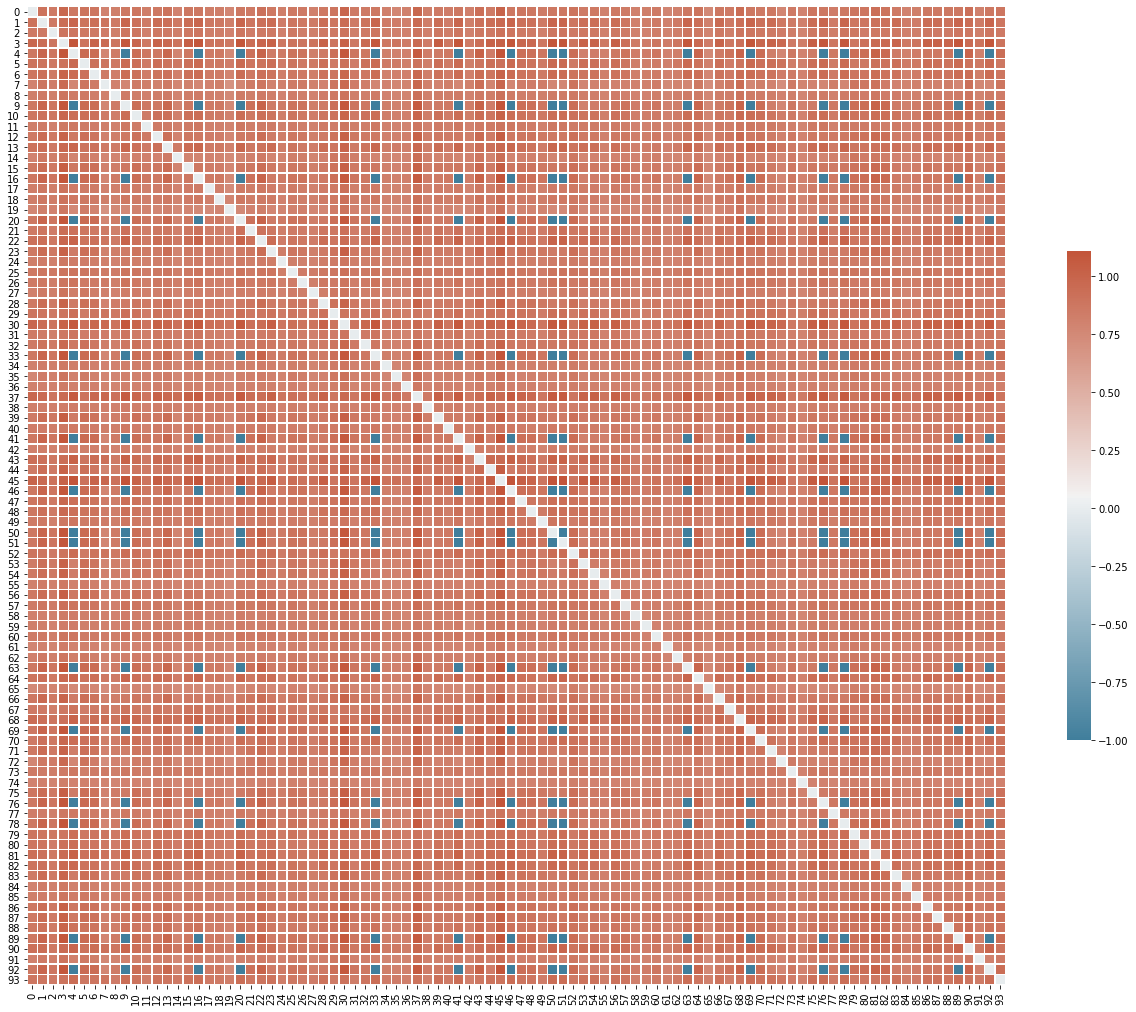

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap="coolwarm"
#cmap="cool"
#cmap="gray_r"


#g = sns.heatmap(semantic_distance_matrix, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
g = sns.heatmap(angle_distance_matrix,
                cmap=cmap, 
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}
               )

In [59]:
condensed_semantic_distance_vector = []
for i in range(1, angle_distance_matrix.shape[0]):
    for j in range(i+1, angle_distance_matrix.shape[0]):
        condensed_semantic_distance_vector.append(angle_distance_matrix[i,j])

In [80]:
condensed_semantic_distance_vector_normalized = [10 if v == -1 else v for v in condensed_semantic_distance_vector]

**Hierarchical clustering**

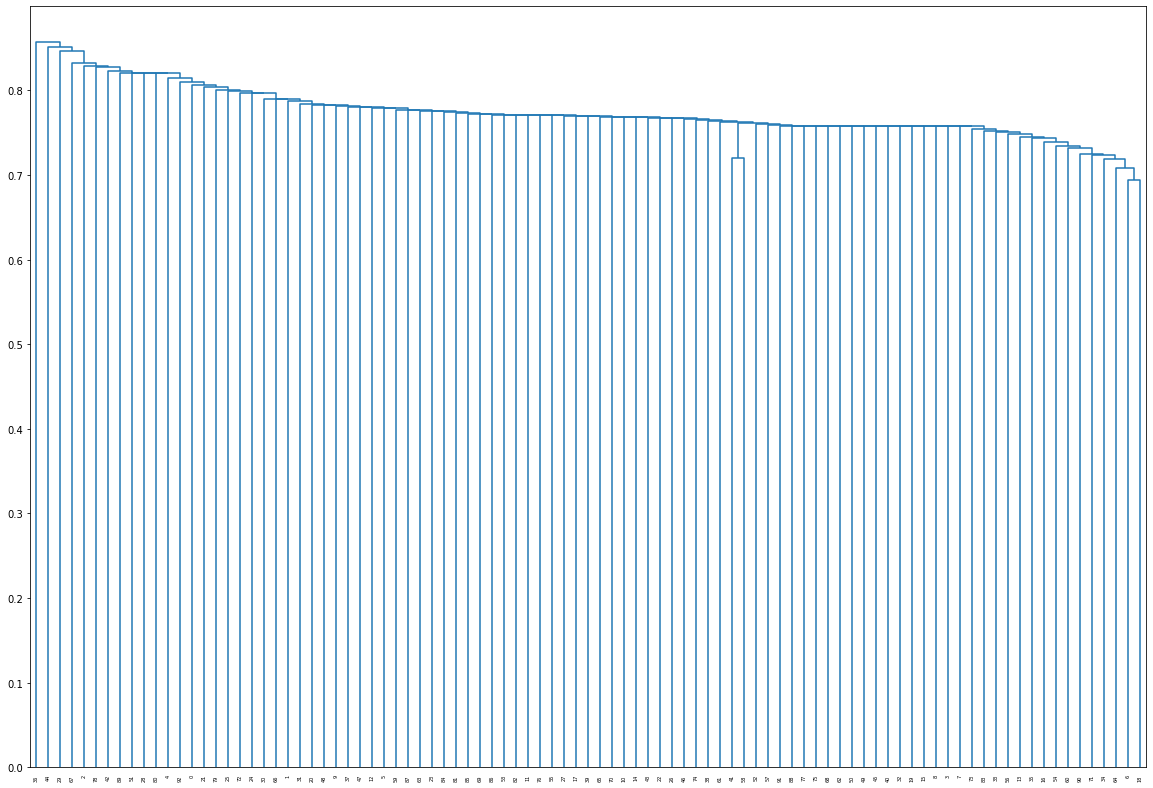

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(condensed_semantic_distance_vector_normalized, 'single', optimal_ordering=False)

#labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()